<a href="https://colab.research.google.com/github/ZJCHEN0109/AIMarchinLearn/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

latex match
$ 面積 = \frac {1}{x_1+2}\pi R^2$

##sklearn.datasets.load_iris

In [34]:
##整理資料/資料預處理
#pandas
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()
df=pd.DataFrame(iris["data"],columns=iris["feature_names"])
df["ans"]=iris["target"]
df.to_csv("iris.csv",encoding="utf-8",index=False)
df
df.shape
# iris

(150, 5)

In [31]:
lista=[1,2],[3,4]
lista

([1, 2], [3, 4])

In [32]:
test=pd.DataFrame(data=([1,2],[3,4]),columns=["a","b"])
test

,a,b
0,1,2
1,3,4


In [64]:
##切成兩分
##資料整理/預處理: pandas機械學習:numpy 
import numpy as np
#np.array(df["ans"])
# df
x = np.array(df.drop(["ans"], axis=1)) ##除掉垂直欄位ans
y = np.array(df["ans"]) #取得分類欄位ans

In [65]:
# from sklearn.model_selection import train_test_split
# train_test_split([1, 2, 3, 4], ["a", "b", "c", "d"], test_size=0.25)
# 大部分人會9:1/8:2切
from sklearn.model_selection import train_test_split
# [90%x, 10%x, 90%y, 10%y]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# x_train.shape
x_test.shape
# y_train
# y_test.shape

(30, 4)

In [61]:
from sklearn.tree import DecisionTreeClassifier
# clf=DecisionTreeClassifier() 
clf=DecisionTreeClassifier(max_depth=2)  ##前剪枝(這邊採用前剪枝 max_depth) 後剪枝 方式來避免過擬合
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [40, 38, 42]\nclass = virginica'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.499\nsamples = 80\nvalue = [0, 38, 42]\nclass = virginica'),
 Text(0.4, 0.16666666666666666, 'gini = 0.139\nsamples = 40\nvalue = [0, 37, 3]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.049\nsamples = 40\nvalue = [0, 1, 39]\nclass = virginica')]

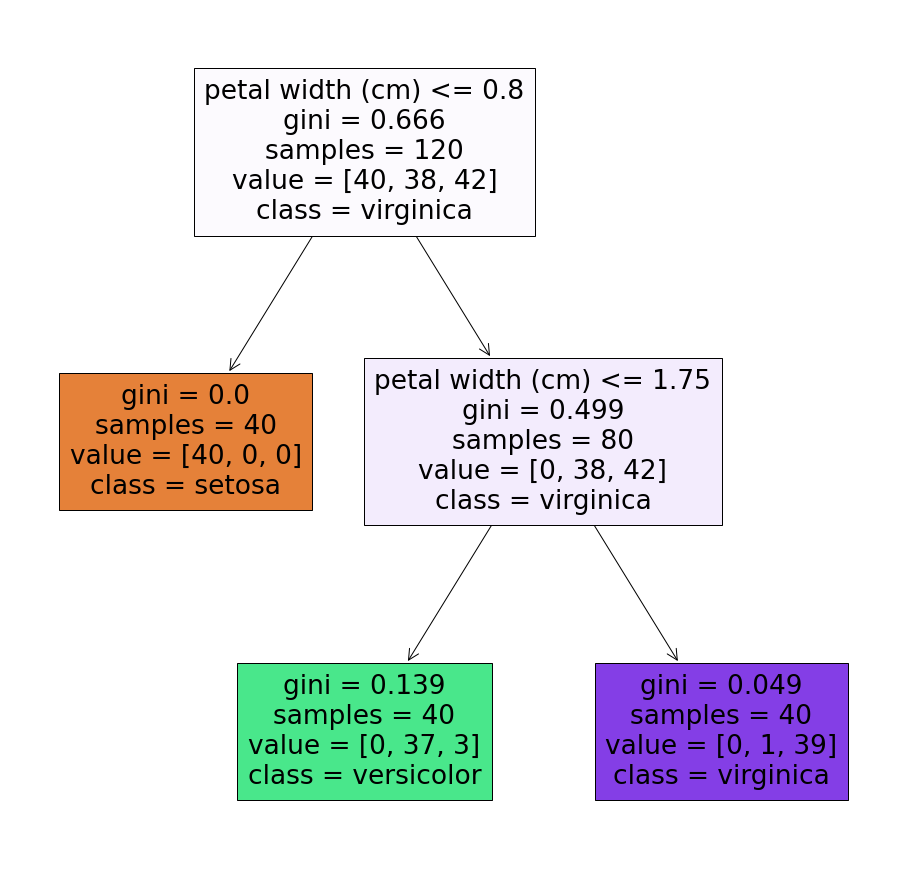

In [62]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))
plot_tree(clf,
    feature_names=iris["feature_names"],
    class_names=iris["target_names"],
    filled=True)

In [66]:
##驗證模型表現如何
#選擇評估標準(分類) 1.正確率 2. f1 score(imblanced)
from sklearn.metrics import accuracy_score
pre=clf.predict(x_test)
# pre
accuracy_score(y_test,pre)

0.9666666666666667